In [56]:
%config Completer.use_jedi = False

# Import Library

In [57]:
import cv2
from PIL import Image 
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy.interpolate import interp1d
from astropy.convolution import Box2DKernel
import scipy.io
from scipy.ndimage import gaussian_filter,convolve
from scipy import ndimage


# Define Variable 

In [58]:
# plt.rcParams["figure.figsize"] = (5,3)

# Define Function

In [59]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h
def ceil_floor_image(image):
    """
    Args:
        image : numpy array of image in datatype int16
    Return :
        image : numpy array of image in datatype uint8 with ceilling(maximum 255) and flooring(minimum 0)
    """
    image[image > 255] = 255
    image[image < 0] = 0
    image = image.astype("uint8")
    return image

def add_gaussian_noise(image, mean=0, std=1):
    """
    Args:
        image : numpy array of image
        mean : pixel mean of image
        standard deviation : pixel standard deviation of image
    Return :
        image : numpy array of image with gaussian noise added
    """
    gaus_noise = np.random.normal(mean, std, image.shape)
    image = image.astype("int16")
    noise_img = image + gaus_noise
    image = ceil_floor_image(image)
    return noise_img 

class EdgeDetection:
    
    def __init__(self, imgPath, method):
        self.imgPath = imgPath
        self.method = method
    
    def getImage(self,Path):
        img = cv2.imread(Path,0).astype('float64')
        img /=255
        
        return img
    
    def getFilter(self, edgeDetectMethod):
        
        if edgeDetectMethod == 'Roberts':
            vFilter = np.array( [[1, 0 ], [0,-1 ]] )
            hFilter = np.array( [[ 0, 1 ], [ -1, 0 ]] )
            
        elif edgeDetectMethod == 'Prewitt':
            vFilter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
            hFilter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        
        elif edgeDetectMethod == 'Sobel':
            vFilter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
            hFilter =  vFilter.T
            
        
        return vFilter, hFilter
    
    def getConvolvedImage(self, img, vFilter, hFilter):
        
        vConvolve = ndimage.convolve(img, vFilter)
        hConvolve = ndimage.convolve(img, hFilter)
        
        return vConvolve, hConvolve
    
    def getEdgeImage(self):
        
        verFilter, HoriFilter = self.getFilter(self.method)
        vEdge, hEdge = self.getConvolvedImage(self.getImage(self.imgPath),
                                         verFilter,
                                         HoriFilter)
        edgeImage = np.sqrt(np.square(hEdge) + np.square(vEdge))
        
        return edgeImage

        



# Main Work

## E.1

##### Load a 1 dimensional edge stored in “edge.mat” file by using ‘load’ command on Matlab.

In [60]:
dataMAT = scipy.io.loadmat('edge.mat')
dataMAT = dataMAT['e']
dataMAT = dataMAT[0]

## E.2
#####  Convolve the edge you have loaded in E.1 with the mask mx1=[1 -1] by using ‘conv’ command. What does the convolution of mask m1 do to the signal? How can you find the location of the edge from the convolved signal?


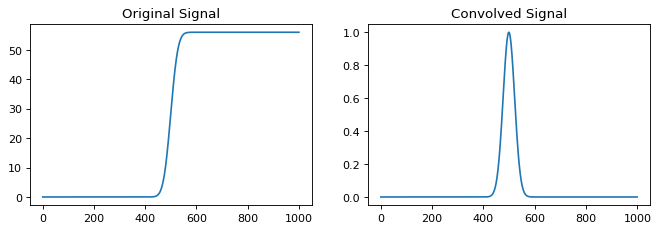

In [61]:
maskFilter = np.array([1, -1])

convDataMAT = np.convolve(dataMAT, 
                   maskFilter,mode = 'valid')


f = plt.figure(figsize=(10, 3), dpi=80)
f.add_subplot(1,2, 1)
plt.title('Original Signal')
plt.plot(np.arange(0, dataMAT.shape[0],1), dataMAT)
f.add_subplot(1,2, 2)
plt.title('Convolved Signal')
plt.plot(np.arange(0, convDataMAT.shape[0],1), convDataMAT)
plt.show(block=True)

## E.3
##### Convolve the edge you have loaded in E.1 with the mask mx2=[1 -2 1] by using ‘conv’ command. What does the convolution of mask m2 do to the signal? How can you find the location of the edge from the convolved signal?

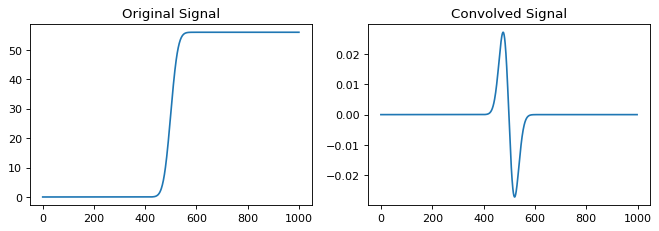

In [62]:
maskFilter = np.array([1, -2, 1])

convDataMAT = np.convolve(dataMAT, 
                   maskFilter,mode = 'valid')


f = plt.figure(figsize=(10, 3), dpi=80)
f.add_subplot(1,2, 1)
plt.title('Original Signal')
plt.plot(np.arange(0, dataMAT.shape[0],1), dataMAT)
f.add_subplot(1,2, 2)
plt.title('Convolved Signal')
plt.plot(np.arange(0, convDataMAT.shape[0],1), convDataMAT)
plt.show(block=True)

## E.4
#####  Add some Gaussian noise with standard deviations 1, and 3 to the edge signal and convolve mx1 and mx2 to the noisy signal and observe the results. How can you now find the location of the edge?

With Standard Deviation -->1

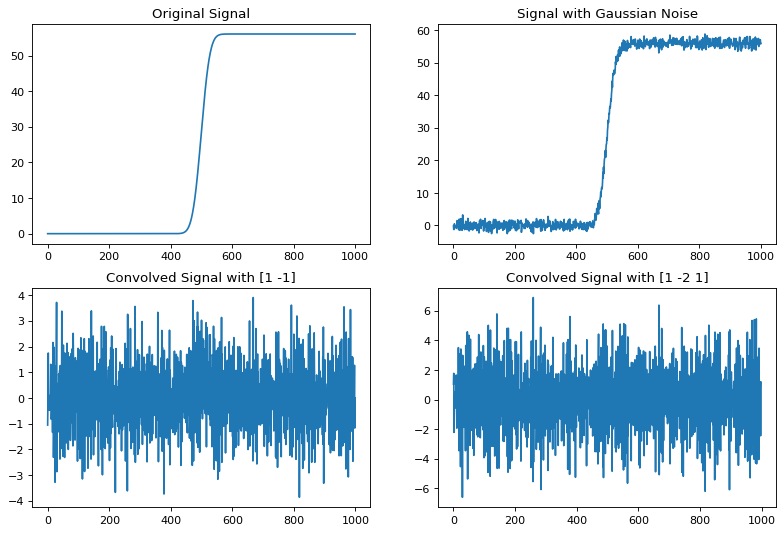

In [63]:
std_devNoise = 1
mean = 0
dataMAT_GaussianNoise = add_gaussian_noise(dataMAT, mean, std_devNoise)

maskFilterE2 = np.array([1, -1])
maskFilterE3 = np.array([1, -2, 1])

convDataMAT_E2 = np.convolve(dataMAT_GaussianNoise, 
                   maskFilterE2,mode = 'valid')

convDataMAT_E3 = np.convolve(dataMAT_GaussianNoise, 
                   maskFilterE3,mode = 'valid')


f = plt.figure(figsize=(12, 8), dpi=80)
f.add_subplot(2,2, 1)
plt.title('Original Signal')
plt.plot(np.arange(0, dataMAT.shape[0],1), dataMAT)
f.add_subplot(2,2, 2)
plt.title('Signal with Gaussian Noise')
plt.plot(np.arange(0, dataMAT_GaussianNoise.shape[0],1), dataMAT_GaussianNoise)
f.add_subplot(2,2, 3)
plt.title('Convolved Signal with [1 -1]')
plt.plot(np.arange(0, convDataMAT_E2.shape[0],1), convDataMAT_E2)
f.add_subplot(2,2, 4)
plt.title('Convolved Signal with [1 -2 1]')
plt.plot(np.arange(0, convDataMAT_E3.shape[0],1), convDataMAT_E3)
plt.show(block=True)

With Standard Deviation -->3

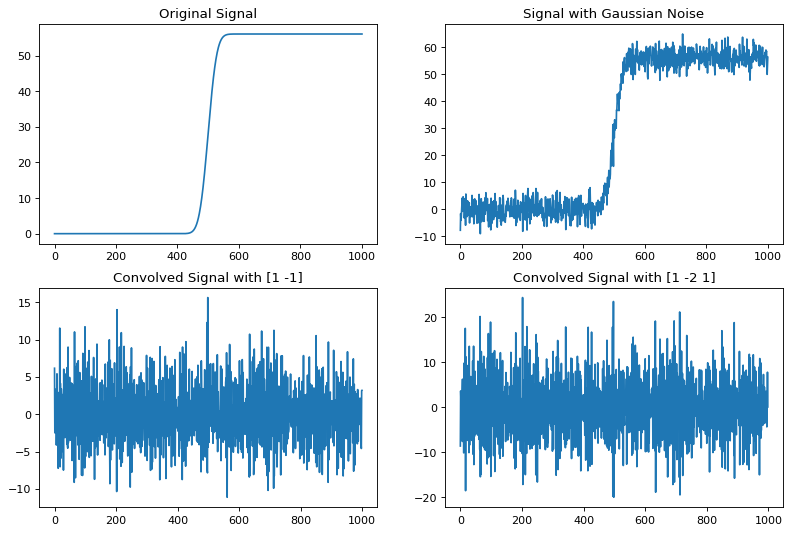

In [64]:
std_devNoise = 3
mean = 0
dataMAT_GaussianNoise = add_gaussian_noise(dataMAT, mean, std_devNoise)

maskFilterE2 = np.array([1, -1])
maskFilterE3 = np.array([1, -2, 1])

convDataMAT_E2 = np.convolve(dataMAT_GaussianNoise, 
                   maskFilterE2,mode = 'valid')

convDataMAT_E3 = np.convolve(dataMAT_GaussianNoise, 
                   maskFilterE3,mode = 'valid')


f = plt.figure(figsize=(12, 8), dpi=80)
f.add_subplot(2,2, 1)
plt.title('Original Signal')
plt.plot(np.arange(0, dataMAT.shape[0],1), dataMAT)
f.add_subplot(2,2, 2)
plt.title('Signal with Gaussian Noise')
plt.plot(np.arange(0, dataMAT_GaussianNoise.shape[0],1), dataMAT_GaussianNoise)
f.add_subplot(2,2, 3)
plt.title('Convolved Signal with [1 -1]')
plt.plot(np.arange(0, convDataMAT_E2.shape[0],1), convDataMAT_E2)
f.add_subplot(2,2, 4)
plt.title('Convolved Signal with [1 -2 1]')
plt.plot(np.arange(0, convDataMAT_E3.shape[0],1), convDataMAT_E3)
plt.show(block=True)

## E.5
#####  Use a Gaussian filter with standard deviation 10 to smooth the noisy edge signals you produced in E.4) and then convolve mx1 and mx2 to the smoothed signals. Can you now find the location of the edge?

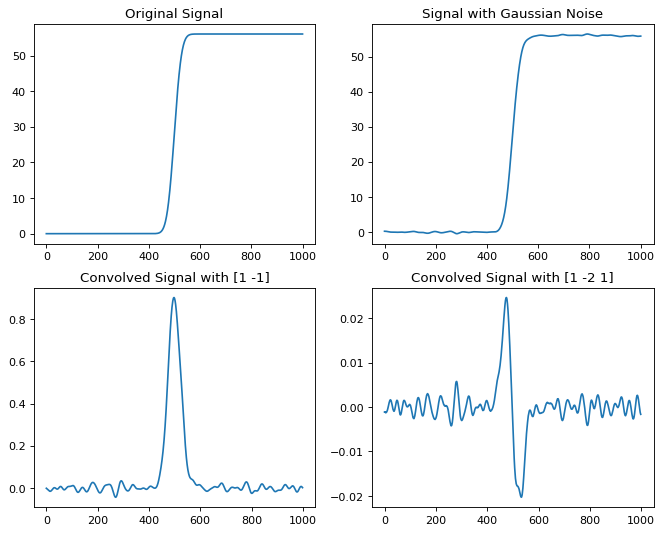

In [65]:
std_devNoise = 1
mean = 0
dataMAT_GaussianNoise = add_gaussian_noise(dataMAT, mean, std_devNoise)
filterSize = dataMAT_GaussianNoise.shape
sigma = 10
gaussFilter_dataMATNoise = gaussian_filter(dataMAT_GaussianNoise, 10)

maskFilterE2 = np.array([1, -1])
maskFilterE3 = np.array([1, -2, 1])

convDataMAT_E2 = np.convolve(gaussFilter_dataMATNoise, 
                   maskFilterE2,mode = 'valid')

convDataMAT_E3 = np.convolve(gaussFilter_dataMATNoise, 
                   maskFilterE3,mode = 'valid')


f = plt.figure(figsize=(10, 8), dpi=80)
f.add_subplot(2,2, 1)
plt.title('Original Signal')
plt.plot(np.arange(0, dataMAT.shape[0],1), dataMAT)
f.add_subplot(2,2, 2)
plt.title('Signal with Gaussian Noise')
plt.plot(np.arange(0, gaussFilter_dataMATNoise.shape[0],1), gaussFilter_dataMATNoise)
f.add_subplot(2,2, 3)
plt.title('Convolved Signal with [1 -1]')
plt.plot(np.arange(0, convDataMAT_E2.shape[0],1), convDataMAT_E2)
f.add_subplot(2,2, 4)
plt.title('Convolved Signal with [1 -2 1]')
plt.plot(np.arange(0, convDataMAT_E3.shape[0],1), convDataMAT_E3)
plt.show(block=True)

## E.6
#####  Load the Lena image by using the ‘imread’. Convolve the image with mx1=[1 -1] and display the magnitude of the convolved image( | Ix |). What has the mx1 mask done to the image?

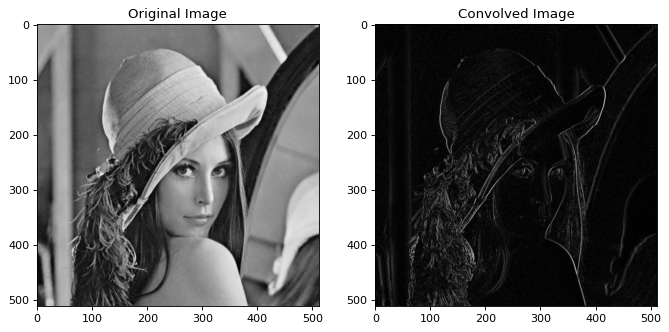

In [66]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE).astype('float64')/255.0
maskFilterE2 = np.array( [[1,-1 ]] )
Ix = cv2.filter2D(src=img_lena, ddepth=-1, kernel=maskFilterE2)

Ix = convolve(img_lena,maskFilterE2)
# Plot images
f = plt.figure(figsize=(10, 10), dpi=80)
f.add_subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(np.abs(img_lena), cmap='gray')
f.add_subplot(1, 2, 2)
plt.title('Convolved Image')
plt.imshow(np.abs(Ix), cmap='gray')
plt.show(block=True)

## E.7
#####  Convolve the image with my1=[1 / -1] and display the magnitude of the convolved image ( | Iy |). What has the my1 mask done to the image? Now display  $\sqrt{(Ix)^2 + (Iy)^2}$ .

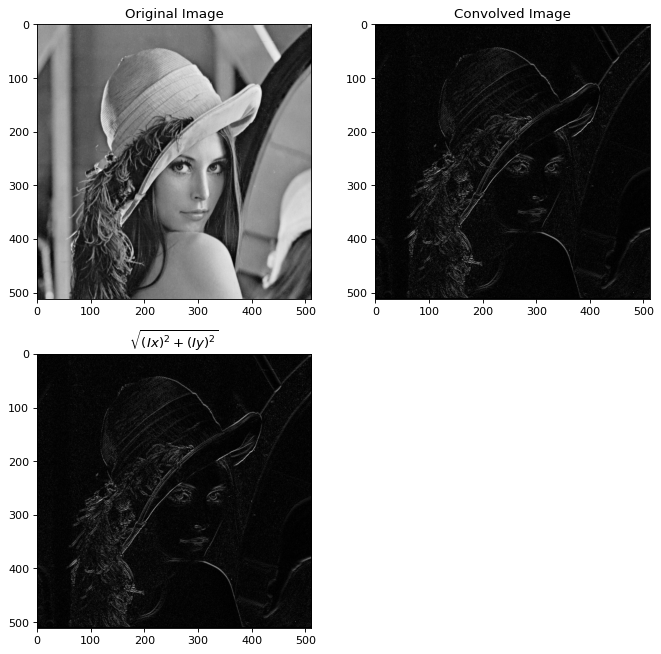

In [67]:
maskFilterE7 = np.array( [[1],[-1 ]] )

Iy = cv2.filter2D(src=img_lena, ddepth=-1, kernel=maskFilterE7)
Iy = convolve(img_lena,maskFilterE7)
f = plt.figure(figsize=(10, 10), dpi=80)
f.add_subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(np.abs(img_lena), cmap='gray')
f.add_subplot(2, 2, 2)
plt.title('Convolved Image')
plt.imshow(np.abs(Iy), cmap='gray')
f.add_subplot(2, 2, 3)
plt.title('$\sqrt{(Ix)^2 + (Iy)^2}$')
gradient_magnitude = np.sqrt(np.square(Iy) + np.square(Iy))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
plt.imshow(np.abs(gradient_magnitude),cmap='gray')
plt.show(block=True)

## E.8
#####  Now produce an edge map of the image by examining the pixels in $\sqrt{(Ix)^2 + (Iy)^2}$. If the value of  $\sqrt{(Ix)^2 + (Iy)^2}$ in a pixel is greater than a threshold, then the gray scale of the corresponding pixel in the edge map is set to 1. However if a pixel in $\sqrt{(Ix)^2 + (Iy)^2}$ is less than the threshold, then the gray scale of the corresponding pixel in the edge map is set to zero. Use values of 100, 50 and 30 as the threshold values.


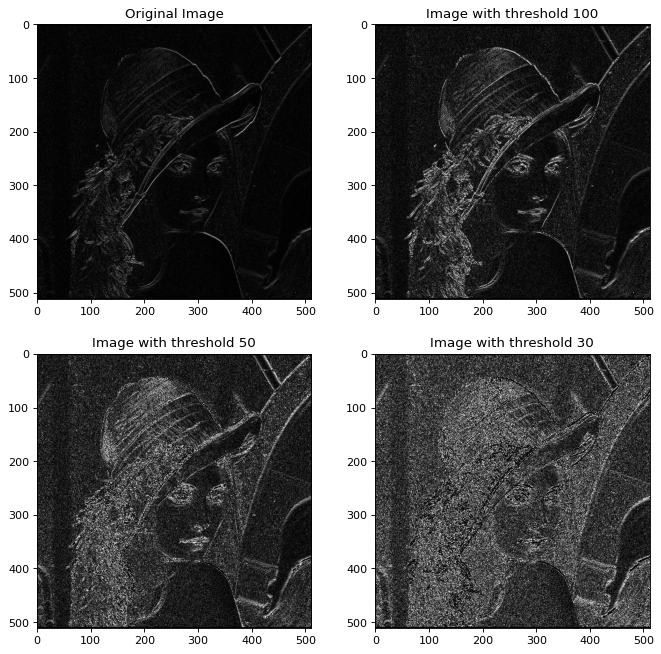

In [68]:
threshold = [100, 50 , 30]

f = plt.figure(figsize=(10, 10), dpi=80)
f.add_subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(np.abs(gradient_magnitude), cmap='gray')
for thresPOS,thres in enumerate(threshold):
    cpy_gradient_magnitude = gradient_magnitude.copy()
    for posX,imRow in enumerate(cpy_gradient_magnitude):
        for posY,pixelValue in enumerate(imRow):
            if cpy_gradient_magnitude[posX, posY]> thres:
                cpy_gradient_magnitude[posX, posY] = 1
    f.add_subplot(2, 2, thresPOS +2)
    plt.title(f'Image with threshold {thres}')
    plt.imshow(np.abs(cpy_gradient_magnitude), cmap='gray')
    
plt.show(block=True)

## E.9
##### By using the ‘Edge’ command, produce an edge map of the Lena image based on the ‘Roberts’, ‘Prewitt’, ‘Sobel’, ‘Laplacian of Gaussian’ and ‘Canny’ edge detection methods.

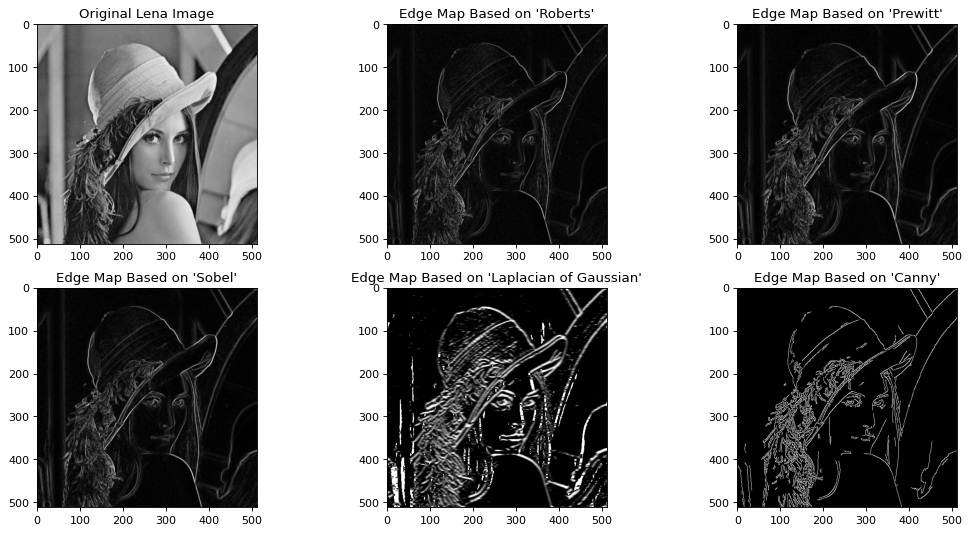

In [69]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)

f = plt.figure(figsize=(16, 8), dpi=80)
f.add_subplot(2,3, 1)
plt.title('Original Lena Image')
plt.imshow(img_lena, cmap='gray')

edgeImage = EdgeDetection('lenaG.bmp', 'Roberts')
f.add_subplot(2,3, 2)
plt.title("Edge Map Based on 'Roberts'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG.bmp', 'Prewitt')
f.add_subplot(2,3, 3)
plt.title("Edge Map Based on 'Prewitt'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG.bmp', 'Sobel')
f.add_subplot(2,3, 4)
plt.title("Edge Map Based on 'Sobel'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

f.add_subplot(2,3, 5)
plt.title("Edge Map Based on 'Laplacian of Gaussian'")
plt.imshow(ndimage.gaussian_laplace(img_lena,2), cmap='gray')

f.add_subplot(2,3, 6)
cannyEdge = cv2.Canny(img_lena,100,200)
plt.title("Edge Map Based on 'Canny'")
plt.imshow(cannyEdge, cmap='gray')

plt.show(block=True)

## E.10
##### Add some Gaussian noise with a standard deviations 20 and 50 to the Lena image and produce edge maps of the noisy Lena images based on the ‘Roberts’, ‘Prewitt’, ‘Sobel’, and ‘Canny’ edge detection methods. Which ones show the best and the worst performances at the presence of noise?

With Standard Deviation -->20

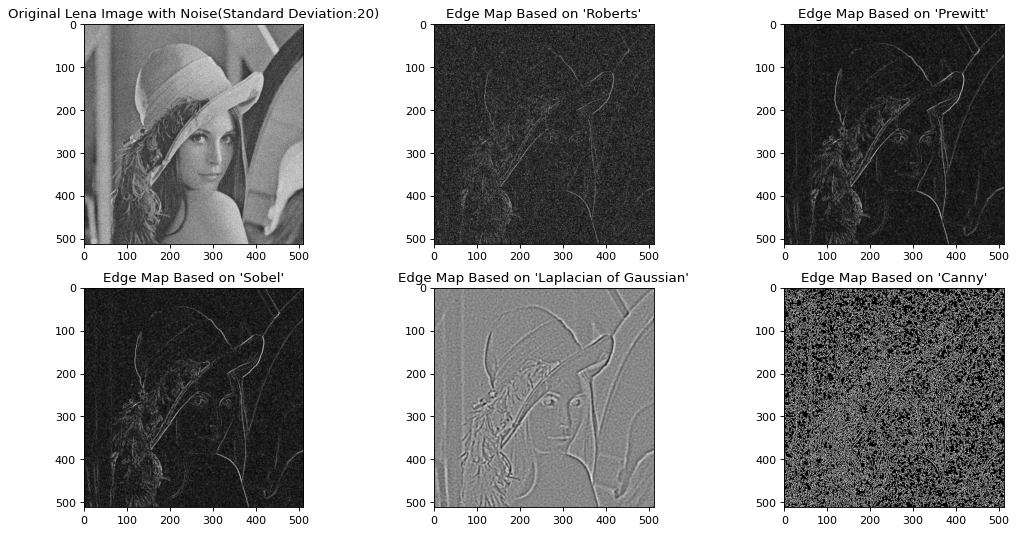

In [70]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)

mean = 0
std_devNoise = 20
img_lenaGaussNoise = add_gaussian_noise(img_lena, mean, std_devNoise)

cv2.imwrite('lenaG_Noise20.bmp',img_lenaGaussNoise)

f = plt.figure(figsize=(16, 8), dpi=80)
f.add_subplot(2,3, 1)
plt.title('Original Lena Image with Noise(Standard Deviation:20)')
plt.imshow(img_lenaGaussNoise, cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise20.bmp', 'Roberts')
f.add_subplot(2,3, 2)
plt.title("Edge Map Based on 'Roberts'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise20.bmp', 'Prewitt')
f.add_subplot(2,3, 3)
plt.title("Edge Map Based on 'Prewitt'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise20.bmp', 'Sobel')
f.add_subplot(2,3, 4)
plt.title("Edge Map Based on 'Sobel'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

f.add_subplot(2,3, 5)
plt.title("Edge Map Based on 'Laplacian of Gaussian'")
plt.imshow(ndimage.gaussian_laplace(img_lenaGaussNoise,2), cmap='gray')

f.add_subplot(2,3, 6)
img_lenaGaussNoise = cv2.imread('lenaG_Noise20.bmp',0)
cannyEdge = cv2.Canny(img_lenaGaussNoise,100,200).astype(float)
plt.title("Edge Map Based on 'Canny'")
plt.imshow(cannyEdge, cmap='gray')

plt.show(block=True)

With Standard Deviation -->50

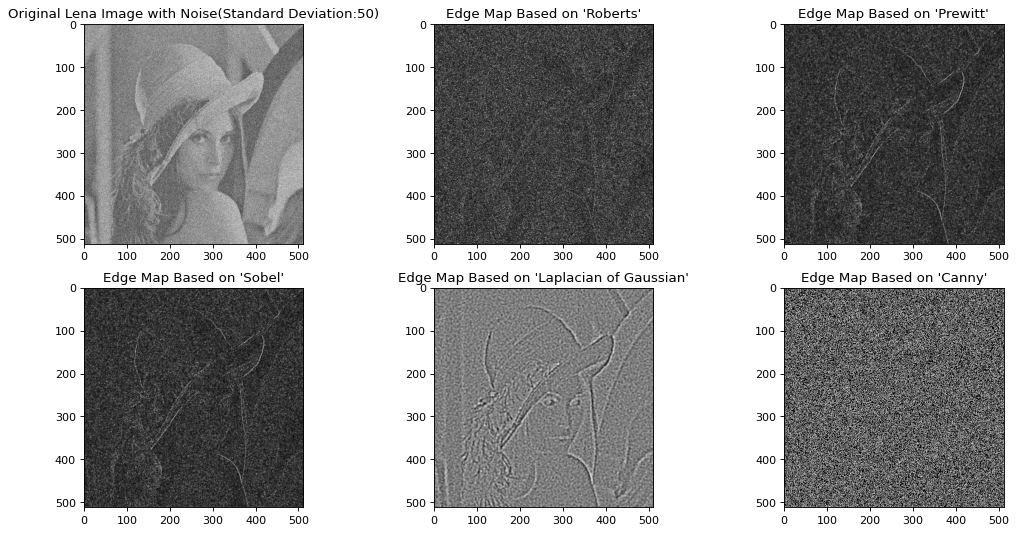

In [71]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)

mean = 0
std_devNoise = 50
img_lenaGaussNoise = add_gaussian_noise(img_lena, mean, std_devNoise)

cv2.imwrite('lenaG_Noise50.bmp',img_lenaGaussNoise)

f = plt.figure(figsize=(16, 8), dpi=80)
f.add_subplot(2,3, 1)
plt.title('Original Lena Image with Noise(Standard Deviation:50)')
plt.imshow(img_lenaGaussNoise, cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise50.bmp', 'Roberts')
f.add_subplot(2,3, 2)
plt.title("Edge Map Based on 'Roberts'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise50.bmp', 'Prewitt')
f.add_subplot(2,3, 3)
plt.title("Edge Map Based on 'Prewitt'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

edgeImage = EdgeDetection('lenaG_Noise50.bmp', 'Sobel')
f.add_subplot(2,3, 4)
plt.title("Edge Map Based on 'Sobel'")
plt.imshow(edgeImage.getEdgeImage(), cmap='gray')

f.add_subplot(2,3, 5)
plt.title("Edge Map Based on 'Laplacian of Gaussian'")
plt.imshow(ndimage.gaussian_laplace(img_lenaGaussNoise,2), cmap='gray')

f.add_subplot(2,3, 6)
img_lenaGaussNoise = cv2.imread('lenaG_Noise50.bmp',0)
cannyEdge = cv2.Canny(img_lenaGaussNoise,100,200)
plt.title("Edge Map Based on 'Canny'")
plt.imshow(cannyEdge, cmap='gray')

plt.show(block=True)